In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def isNaN(num):
    return num != num

In [3]:
weather_file_path = "all_weather_by_hour_2023-2025_v1.csv"
df_weather = pd.read_csv(weather_file_path)

regions_file_path = "regions.csv"
df_regions = pd.read_csv(regions_file_path)

## regions preparing

In [4]:
# add Kyiv with id=26 to df_regions
kyiv_row = pd.DataFrame([{'region': 'Київ', 'center_city_ua': 'Київ', 'center_city_en': 'Kyiv', 'region_alt': 'Київ', 'region_id': 26}])
df_regions = pd.concat([df_regions, kyiv_row], ignore_index=True)

In [5]:
df_regions

,region,center_city_ua,center_city_en,region_alt,region_id
0,АР Крим,Сімферополь,Simferopol,Крим,1
1,Вінницька,Вінниця,Vinnytsia,Вінниччина,2
2,Волинська,Луцьк,Lutsk,Волинь,3
3,Дніпропетровська,Дніпро,Dnipro,Дніпропетровщина,4
4,Донецька,Донецьк,Donetsk,Донеччина,5
5,Житомирська,Житомир,Zhytomyr,Житомирщина,6
6,Закарпатська,Ужгород,Uzhgorod,Закарпаття,7
7,Запорізька,Запоріжжя,Zaporozhye,Запоріжжя,8
8,Івано-Франківська,Івано-Франківськ,Ivano-Frankivsk,Івано-Франківщина,9
9,Київська,Київ,Kyiv,Київщина,10


## weather preparing


In [6]:
df_weather["day_datetime"] = pd.to_datetime(df_weather["day_datetime"])

In [7]:
weather_exclude = [
"day_feelslikemax",
"day_feelslikemin",
"day_sunriseEpoch",
"day_sunsetEpoch",
"day_description",
"city_latitude",
"city_longitude",
"city_address",
"city_timezone",
"city_tzoffset",
"day_feelslike",
"day_precipprob",
"day_snow",
"day_snowdepth",
"day_windgust",
"day_winddir",
"day_pressure",
"day_cloudcover",
"day_visibility",
"day_conditions",
"day_icon",
"day_source",
"day_preciptype",
"day_stations",
"hour_icon",
"hour_source",
"hour_stations",
"hour_feelslike",
"hour_preciptype",
"hour_conditions",
"hour_solarenergy",
"day_sunset",
"day_sunrise"
]

In [8]:
df_weather.drop(weather_exclude, axis=1, errors = 'ignore', inplace=True)

In [9]:
df_weather.sample(7)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,hour_snow,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex
156752,"Івано-Франківськ, Україна",2022-10-24,1666558800,18.1,3.8,10.2,6.9,81.8,0.3,8.33,...,0.0,0.0,6.5,2.5,215.5,1021.0,24.1,100.0,29.0,0.0
584617,"Львів, Україна",2024-07-29,1722200400,22.6,11.4,17.6,10.9,67.3,2.0,4.17,...,0.0,0.0,21.2,13.0,292.5,1021.0,NaN,0.0,0.0,0.0
157121,"Івано-Франківськ, Україна",2022-11-08,1667858400,13.4,5.0,8.8,7.5,92.0,0.0,0.00,...,0.0,0.0,9.0,3.6,140.4,1021.0,24.1,44.4,18.0,0.0
444488,"Тернопіль, Україна",2023-05-14,1684011600,21.7,5.4,14.8,3.0,50.7,0.0,0.00,...,0.0,0.0,18.7,3.6,100.0,1023.9,10.0,0.9,373.9,4.0
605099,"Полтава, Україна",2024-10-19,1729285200,7.1,4.4,6.1,2.8,79.9,0.6,20.83,...,0.0,0.0,39.6,14.4,10.0,1027.2,10.0,80.0,276.8,3.0
15801,"Кропивницький, Україна",2023-01-17,1673906400,7.6,0.9,4.0,3.1,91.6,0.3,8.33,...,0.0,0.0,35.6,20.9,137.7,1009.0,24.1,100.0,35.0,0.0
577002,"Львів, Україна",2023-09-15,1694725200,19.1,13.3,16.0,12.3,80.0,0.1,4.17,...,0.0,0.0,24.8,11.2,58.0,1023.0,NaN,93.5,39.5,0.0


In [10]:
city_to_region_id = dict(zip(df_regions['center_city_ua'], df_regions['region_id']))

df_weather['city_clean'] = df_weather['city_resolvedAddress'].str.split(',').str[0].str.strip()
df_weather['city_clean'] = df_weather['city_clean'].replace('Хмельницька область', 'Хмельницький')
df_weather['region_id'] = df_weather['city_clean'].map(city_to_region_id)

In [11]:
df_weather.sample(12)

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,city_clean,region_id
539569,"Суми, Україна",2023-08-29,1693256400,28.6,17.6,22.3,17.9,77.3,1.500,16.67,...,14.4,10.4,104.2,1010.0,NaN,56.3,0.0,0.0,Суми,18
470272,"Житомир, Україна",2024-03-12,1710194400,1.2,-0.3,0.6,-1.4,87.0,10.000,8.33,...,37.1,20.9,109.8,1020.0,NaN,100.0,96.4,1.0,Житомир,6
247512,"Київ, Україна",2024-02-12,1707688800,6.7,1.7,3.9,3.6,98.4,0.000,0.00,...,19.1,10.4,121.0,1006.0,NaN,100.0,0.0,0.0,Київ,26
557904,"Вінниця, Україна",2023-08-22,1692651600,27.7,18.1,23.0,14.7,62.7,0.000,0.00,...,15.1,9.7,298.0,1018.0,NaN,5.6,0.0,0.0,Вінниця,2
582748,"Львів, Україна",2024-05-12,1715461200,15.6,4.5,11.0,0.0,49.5,0.000,0.00,...,16.9,10.4,34.1,1022.0,NaN,80.1,0.0,0.0,Львів,13
524038,"Черкаси, Україна",2023-12-30,1703887200,8.7,2.2,5.4,2.2,80.0,0.000,0.00,...,32.8,17.6,247.5,1012.0,NaN,70.9,0.0,0.0,Черкаси,23
85910,"Хмельницька область, Україна",2022-11-20,1668895200,-0.5,-3.9,-1.8,-3.1,91.4,4.100,45.83,...,30.6,14.0,98.2,1016.0,0.1,100.0,69.0,1.0,Хмельницький,22
320581,"Кропивницький, Україна",2024-01-03,1704232800,4.2,-3.2,-0.2,-1.5,90.8,1.000,4.17,...,31.3,15.8,132.9,1006.0,NaN,100.0,131.9,1.0,Кропивницький,11
294600,"Луцьк, Луцький район, Україна",2023-02-26,1677362400,2.9,-1.7,1.0,-1.0,86.4,0.123,4.17,...,36.0,19.1,258.3,999.0,NaN,73.0,0.0,0.0,Луцьк,3
478457,"Житомир, Україна",2025-02-16,1739656800,-2.6,-7.7,-5.6,-9.7,73.7,0.200,4.17,...,18.7,3.6,300.0,1020.7,10.0,80.0,72.5,1.0,Житомир,6


In [12]:
df_weather_unique = df_weather.drop_duplicates(subset='region_id')
df_weather_unique

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,city_clean,region_id
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,31.3,15.5,275.6,1020.0,0.0,91.5,0.0,0.0,Луцьк,3
7944,"Кропивницький, Україна",2022-02-24,1645653600,6.2,-1.3,2.2,-1.2,78.9,0.000,0.00,...,4.3,2.9,183.0,1021.0,24.1,56.2,0.0,0.0,Кропивницький,11
15888,"Дніпро, Україна",2022-02-24,1645653600,8.0,-2.0,3.1,-2.2,70.6,0.000,0.00,...,9.7,10.8,4.0,1019.0,10.0,14.1,0.0,0.0,Дніпро,4
23832,"Київ, Україна",2022-02-24,1645653600,5.3,1.9,2.9,1.2,88.9,0.100,4.17,...,28.8,7.4,217.0,1017.9,9.9,99.3,0.0,0.0,Київ,26
31776,"Херсон, Україна",2022-02-24,1645653600,9.8,0.0,5.3,-1.0,65.8,0.000,0.00,...,11.2,7.6,29.4,1020.0,24.1,100.0,0.0,0.0,Херсон,21
39720,"Чернівці, Україна",2022-02-24,1645653600,6.5,-0.2,3.4,-0.8,74.9,0.008,8.33,...,28.8,14.4,297.0,1023.3,10.0,30.0,0.0,0.0,Чернівці,24
47664,"Чернігів, Україна",2022-02-24,1645653600,5.2,0.3,2.4,-0.1,83.8,0.300,12.50,...,12.6,7.2,181.5,1019.0,24.1,98.5,0.0,0.0,Чернігів,25
55608,"Одеса, Україна",2022-02-24,1645653600,9.0,1.0,5.2,0.8,74.0,0.000,0.00,...,5.8,0.0,0.0,1019.0,10.0,93.7,0.0,0.0,Одеса,15
63552,"Миколаїв, Україна",2022-02-24,1645653600,8.8,0.0,4.8,-0.9,68.3,0.000,0.00,...,6.8,3.2,129.8,1020.0,24.1,73.9,0.0,0.0,Миколаїв,14
71496,"Харків, Україна",2022-02-24,1645653600,5.0,-4.0,0.6,-4.7,70.0,0.000,0.00,...,4.3,3.6,9.0,1019.0,6.0,1.5,0.0,0.0,Харків,20


In [13]:
# no Crimea and Luhansk

In [14]:
df_weather.drop(['city_resolvedAddress', 'city_clean'], axis=1, inplace=True)

In [15]:
df_weather.sample(13)

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_windspeed,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,region_id
574222,2023-05-22,1684702800,21.6,6.7,15.7,5.0,51.7,0.000,0.00,14.4,...,0.00,18.4,10.8,85.2,1016.0,NaN,95.3,0.0,0.0,13
541832,2023-12-01,1701381600,1.2,-5.3,-1.7,-3.1,89.6,11.000,12.50,24.5,...,3.95,39.6,21.4,131.0,1007.7,4.0,100.0,1.1,0.0,18
261442,2023-08-05,1691182800,37.2,20.6,28.7,17.6,56.3,0.000,0.00,20.5,...,0.00,35.6,17.3,102.6,1014.0,NaN,0.7,695.6,7.0,21
86059,2022-11-26,1669413600,0.4,-0.8,-0.3,-1.2,93.8,0.100,4.17,13.0,...,6.30,15.5,5.0,308.1,1028.0,24.1,85.6,0.0,0.0,22
374354,2023-10-23,1698008400,20.7,13.3,16.0,12.5,81.2,0.000,0.00,19.1,...,0.00,22.0,15.1,189.0,1013.0,NaN,81.4,0.0,0.0,8
96211,2022-04-01,1648760400,7.7,2.3,5.6,5.1,96.1,19.034,16.67,17.6,...,0.00,19.8,14.2,313.0,994.2,11.2,100.0,6.0,0.0,7
253410,2024-10-14,1728853200,11.4,7.1,9.1,6.9,86.8,0.500,4.17,25.6,...,0.00,43.9,22.3,269.9,1014.0,NaN,95.9,0.0,0.0,26
112568,2022-04-21,1650488400,8.7,4.2,6.3,4.4,87.5,5.014,8.33,24.9,...,0.00,31.7,17.9,270.0,1008.6,4.1,100.0,16.0,0.0,17
481031,2023-04-25,1682370000,16.6,7.4,12.1,7.5,74.0,0.303,8.33,21.6,...,0.00,27.0,10.8,101.0,1008.4,10.0,89.6,0.0,0.0,17
192828,2024-03-17,1710626400,11.2,0.7,5.1,2.7,85.2,0.980,4.17,22.4,...,0.00,20.5,6.9,68.0,1016.8,15.2,90.3,273.1,3.0,24


In [16]:
nan_counts = df_weather.isna().sum()
print(nan_counts[nan_counts > 0].sort_values(ascending=False))

hour_visibility        276458
hour_solarradiation      4336
hour_uvindex             4336
day_solarradiation        552
day_solarenergy           552
day_uvindex               552
hour_precip               102
dtype: int64


In [17]:
columns_to_check = [
    'day_tempmax', 'day_tempmin', 'day_temp', 'day_dew', 'day_humidity',
    'day_precip', 'day_precipcover', 'day_solarradiation', 'day_solarenergy',
    'day_uvindex', 'day_moonphase', 'hour_temp', 'hour_humidity', 'hour_dew',
    'hour_precip', 'hour_precipprob', 'hour_snow', 'hour_snowdepth',
    'hour_windgust', 'hour_windspeed', 'hour_winddir', 'hour_pressure',
    'hour_visibility', 'hour_cloudcover', 'hour_solarradiation', 'hour_uvindex'
]

def fill_daily(group):
    for col in columns_to_check:
        if group[col].dtype in ['float64', 'int64']:
            mean_value = group[col].mean()
            group[col] = group[col].fillna(mean_value)
    return group

df_weather_cleaned = df_weather.groupby('day_datetime').apply(fill_daily)

for col in columns_to_check:
    if df_weather_cleaned[col].isna().any():
        df_weather_cleaned[col] = df_weather_cleaned[col].fillna(df_weather_cleaned[col].mean())

In [18]:
nan_counts = df_weather_cleaned.isna().sum()
print(nan_counts[nan_counts > 0].sort_values(ascending=False))

Series([], dtype: int64)


In [19]:
df_weather_cleaned.sample(10)

,,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_windspeed,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,region_id
day_datetime,,,,,,,,,,,,,,,,,,,,,,
2024-09-13,363693,2024-09-13,1726174800,28.4,18.2,23.0,7.4,37.8,0.6,12.50,21.2,...,0.0,38.9,19.4,94.0,1014.0,9.433117,2.1,0.0,0.0,5
2022-07-05,169988,2022-07-05,1656968400,30.7,17.3,24.8,16.0,60.8,0.0,0.00,7.2,...,0.0,3.6,0.1,300.0,1014.9,11.000000,30.0,8.0,0.0,18
2022-12-09,70464,2022-12-09,1670536800,9.8,5.7,8.1,7.7,97.3,3.7,25.00,15.8,...,0.0,4.3,1.8,67.9,1017.0,6.300000,100.0,0.0,0.0,14
2023-01-30,423497,2023-01-30,1675029600,0.4,-8.4,-3.2,-5.2,86.2,0.0,0.00,14.4,...,6.9,13.3,3.6,230.0,1012.0,11.860753,95.7,25.7,0.0,14
2025-01-03,329354,2025-01-03,1735855200,3.5,-0.6,1.3,-0.4,88.7,1.0,4.17,18.0,...,0.0,23.4,18.0,220.0,1010.4,10.000000,54.3,0.0,0.0,11
2023-10-15,596209,2023-10-15,1697317200,19.2,9.8,14.3,10.3,77.8,0.0,0.00,20.2,...,0.0,31.0,17.6,190.4,1015.0,13.719171,12.9,0.0,0.0,16
2024-09-10,234087,2024-09-10,1725915600,25.4,16.2,20.6,16.4,77.3,0.0,0.00,15.5,...,0.0,29.9,12.2,140.4,1007.0,13.694527,99.9,476.6,5.0,15
2023-08-02,261381,2023-08-02,1690923600,30.5,16.5,23.6,17.5,71.8,0.0,0.00,16.6,...,0.0,18.7,10.8,227.6,1009.0,14.026108,80.2,0.0,0.0,21
2022-04-07,24845,2022-04-07,1649278800,19.7,5.2,12.6,2.9,54.1,0.1,4.17,21.6,...,0.0,14.8,0.0,205.0,1006.7,20.000000,30.0,0.0,0.0,26


# Weather visualisation

In [20]:
df_weather = df_weather_cleaned

In [21]:
replacement = df_weather[df_weather['region_id'] == 26].copy()
replacement['region_id'] = 10
df_weather = pd.concat([df_weather, replacement], ignore_index=True)

In [22]:
id_to_region_name = dict(zip(df_regions['region_id'], df_regions['region']))

## Average Precipitation in Ukraine by regions

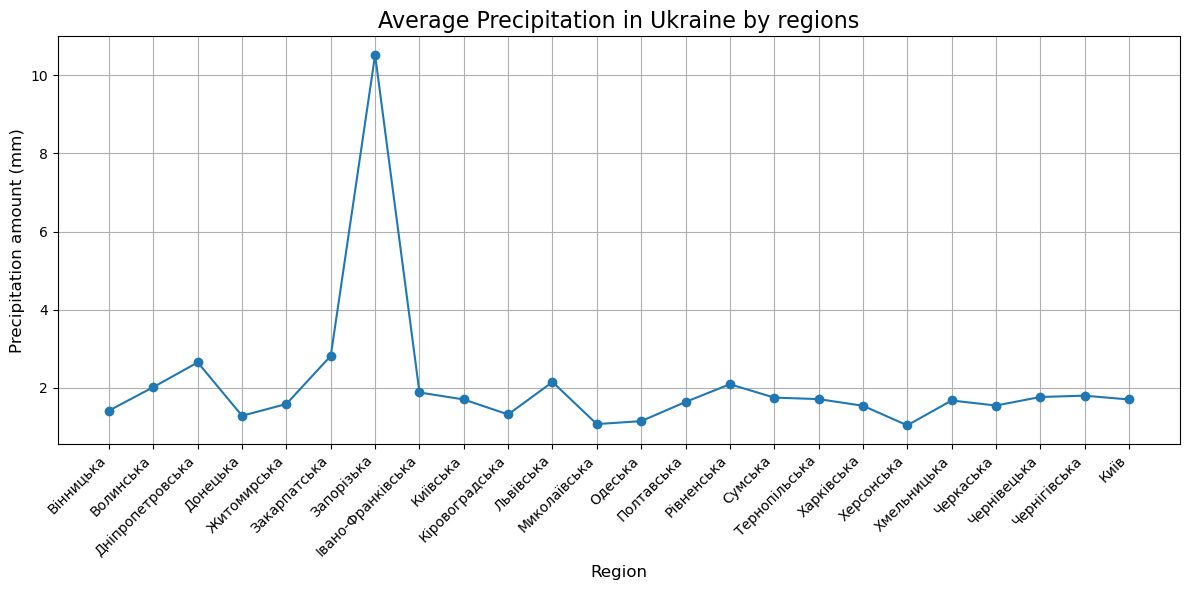

In [23]:
region_precip = df_weather.groupby('region_id')['day_precip'].mean().sort_index()
region_ids = region_precip.index.tolist()
region_labels = [id_to_region_name.get(rid, f"ID {rid}") for rid in region_ids]
x_pos = list(range(len(region_ids)))

plt.figure(figsize=(12, 6))
plt.plot(x_pos, region_precip.values, marker='o', linestyle='-')

plt.title('Average Precipitation in Ukraine by regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Precipitation amount (mm)', fontsize=12)
plt.xticks(ticks=x_pos, labels=region_labels, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

### as we can see above, there is some anomaly in Запорізька область, so lets change it

In [24]:
# as we can see above, there is some anomaly in Запорізька область, so lets change it
df_weather[df_weather['region_id'] == 21]['day_precip'].describe()

count    26448.000000
mean         1.043924
std          3.564535
min          0.000000
25%          0.000000
50%          0.000000
75%          0.400000
max         49.100000
Name: day_precip, dtype: float64

In [25]:
very_large_threshold = 50

very_large_mask = df_weather['day_precip'] > very_large_threshold

df_weather.loc[very_large_mask, 'day_precip'] = df_weather.loc[very_large_mask, 'day_precip'] / 1000

In [26]:
df_weather

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_windspeed,...,hour_snowdepth,hour_windgust,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,region_id
0,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,0.2,31.3,15.5,275.6,1020.0,0.000000,91.5,0.000000,0.000000,3
1,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,0.2,27.7,14.8,280.3,1021.0,0.200000,88.2,0.000000,0.000000,3
2,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,0.1,29.2,14.4,310.0,1022.0,10.000000,100.0,91.366165,0.828947,3
3,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,0.1,23.8,13.3,295.1,1021.0,0.100000,92.0,0.000000,0.000000,3
4,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,0.1,24.5,13.3,305.8,1021.0,0.000000,93.8,0.000000,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634747,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,0.9,16.9,10.1,181.6,1027.0,8.496354,95.6,0.000000,0.000000,10
634748,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1.0,17.6,0.0,189.9,1027.0,4.000000,100.0,0.000000,0.000000,10
634749,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1.0,18.4,9.4,198.3,1027.0,8.496354,100.0,0.000000,0.000000,10
634750,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1.0,16.6,8.3,199.9,1027.0,8.496354,97.6,0.000000,0.000000,10


## Average Precipitation in Ukraine by regions

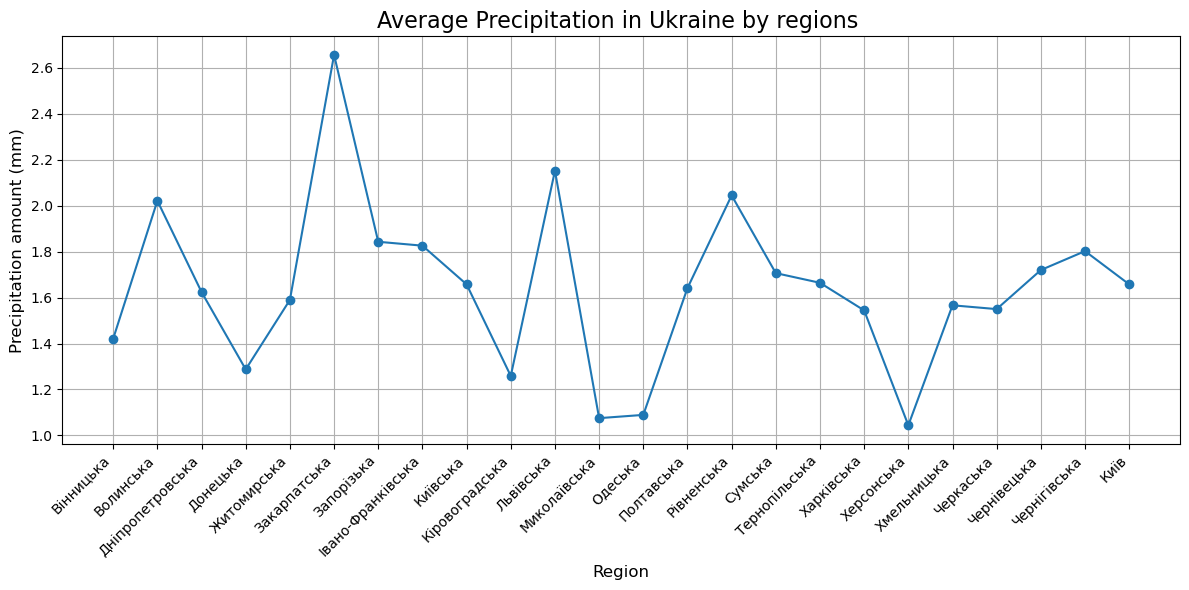

In [27]:
plt.figure(figsize=(12, 6))
grouped_max = df_weather.groupby('region_id')['day_precip'].mean().sort_index()

region_ids = grouped_max.index.tolist()
region_labels = [id_to_region_name.get(rid, f"ID {rid}") for rid in region_ids]

x_pos = list(range(len(region_ids)))

plt.plot(x_pos, grouped_max.values, marker='o', linestyle='-')

plt.title('Average Precipitation in Ukraine by regions ', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Precipitation amount (mm)', fontsize=12)
plt.xticks(ticks=x_pos, labels=region_labels, rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Average Monthly Precipitation in Ukraine

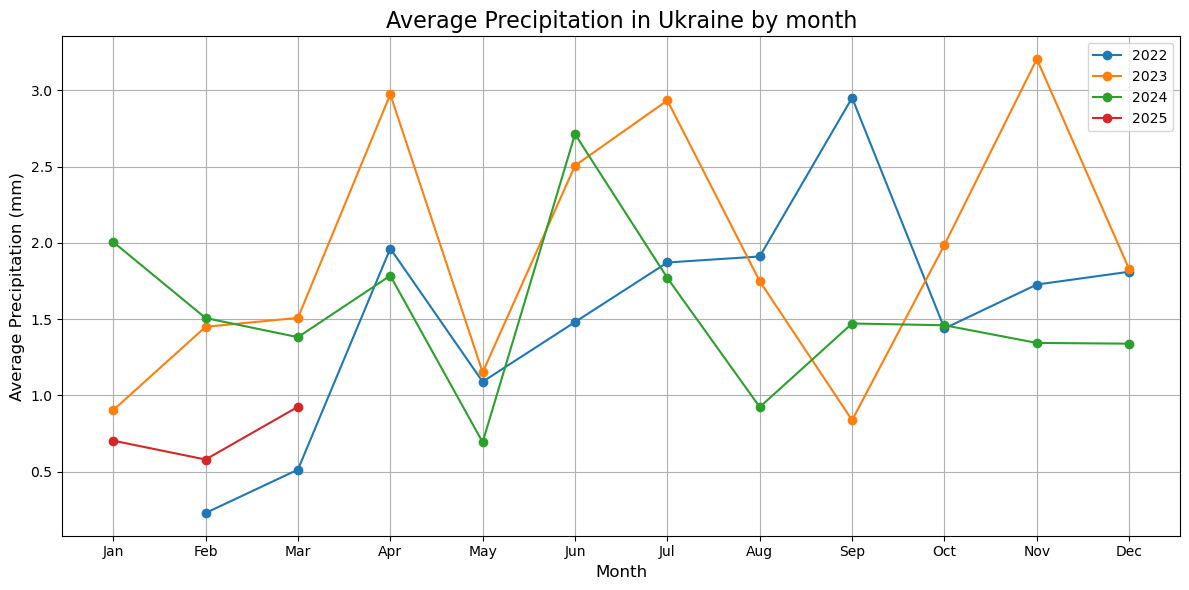

In [28]:
df_weather['month'] = df_weather['day_datetime'].dt.month
df_weather['year'] = df_weather['day_datetime'].dt.year

precip_2022 = df_weather[df_weather['year'] == 2022]
precip_2023 = df_weather[df_weather['year'] == 2023]
precip_2024 = df_weather[df_weather['year'] == 2024]
precip_2025 = df_weather[df_weather['year'] == 2025]

plt.figure(figsize=(12, 6))

precip_2022.groupby('month')['day_precip'].mean().plot(marker='o', linestyle='-', label='2022')
precip_2023.groupby('month')['day_precip'].mean().plot(marker='o', linestyle='-', label='2023')
precip_2024.groupby('month')['day_precip'].mean().plot(marker='o', linestyle='-', label='2024')
precip_2025.groupby('month')['day_precip'].mean().plot(marker='o', linestyle='-', label='2025')

plt.title('Average Precipitation in Ukraine by month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Precipitation (mm)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
df_weather

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_windspeed,...,hour_windspeed,hour_winddir,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,region_id,month,year
0,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,15.5,275.6,1020.0,0.000000,91.5,0.000000,0.000000,3,2,2022
1,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,14.8,280.3,1021.0,0.200000,88.2,0.000000,0.000000,3,2,2022
2,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,14.4,310.0,1022.0,10.000000,100.0,91.366165,0.828947,3,2,2022
3,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,13.3,295.1,1021.0,0.100000,92.0,0.000000,0.000000,3,2,2022
4,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,13.3,305.8,1021.0,0.000000,93.8,0.000000,0.000000,3,2,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634747,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,10.1,181.6,1027.0,8.496354,95.6,0.000000,0.000000,10,3,2025
634748,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,0.0,189.9,1027.0,4.000000,100.0,0.000000,0.000000,10,3,2025
634749,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,9.4,198.3,1027.0,8.496354,100.0,0.000000,0.000000,10,3,2025
634750,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,8.3,199.9,1027.0,8.496354,97.6,0.000000,0.000000,10,3,2025


## Top 10 highest and lowest temperatures 

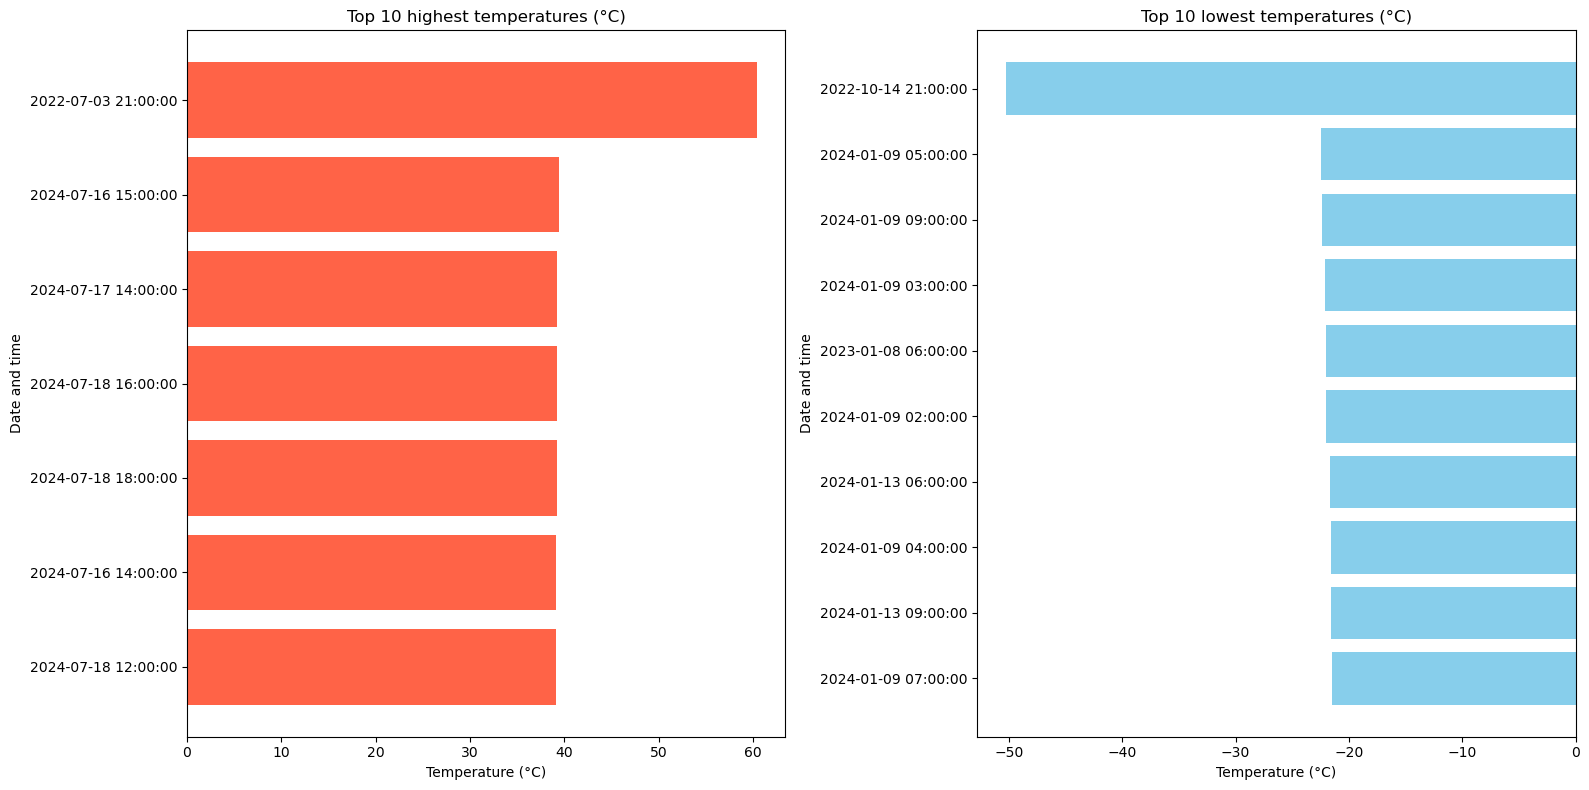

In [30]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])

df_weather['datetime_full'] = pd.to_datetime(
    df_weather['day_datetime'].dt.strftime('%Y-%m-%d') + ' ' + df_weather['hour_datetime']
)

df_weather['hour_temp'] = pd.to_numeric(df_weather['hour_temp'], errors='coerce')

top10_high_temp = df_weather.nlargest(10, 'hour_temp')
top10_low_temp = df_weather.nsmallest(10, 'hour_temp')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(top10_high_temp['datetime_full'].astype(str), top10_high_temp['hour_temp'], color='tomato')
plt.title('Top 10 highest temperatures (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top10_low_temp['datetime_full'].astype(str), top10_low_temp['hour_temp'], color='skyblue')
plt.title('Top 10 lowest temperatures (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

### as we can see the biggest and the smallest temperature values are unreal for our climate, lets change it

## Top 10 highest and lowest temperatures (fixed)

In [31]:
df_weather = df_weather[df_weather['day_tempmax'] != 60.4]

df_weather = df_weather[df_weather['day_tempmin'] != -50.3]

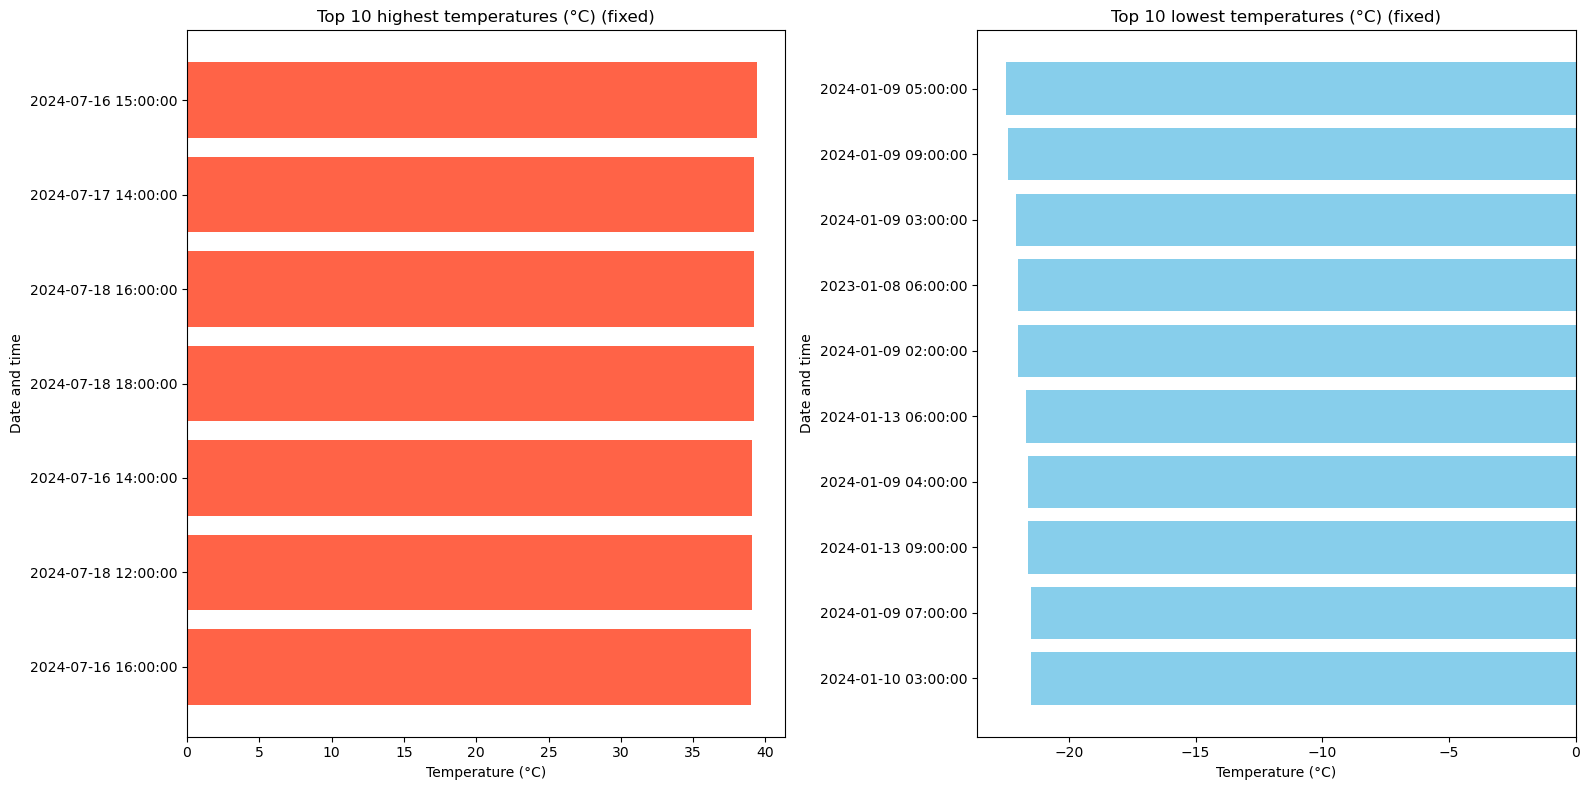

In [32]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])

df_weather['datetime_full'] = pd.to_datetime(
    df_weather['day_datetime'].dt.strftime('%Y-%m-%d') + ' ' + df_weather['hour_datetime']
)

df_weather['hour_temp'] = pd.to_numeric(df_weather['hour_temp'], errors='coerce')

top10_high_temp = df_weather.nlargest(10, 'hour_temp')
top10_low_temp = df_weather.nsmallest(10, 'hour_temp')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(top10_high_temp['datetime_full'].astype(str), top10_high_temp['hour_temp'], color='tomato')
plt.title('Top 10 highest temperatures (°C) (fixed)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top10_low_temp['datetime_full'].astype(str), top10_low_temp['hour_temp'], color='skyblue')
plt.title('Top 10 lowest temperatures (°C) (fixed)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Average Monthly Temperature in Ukraine

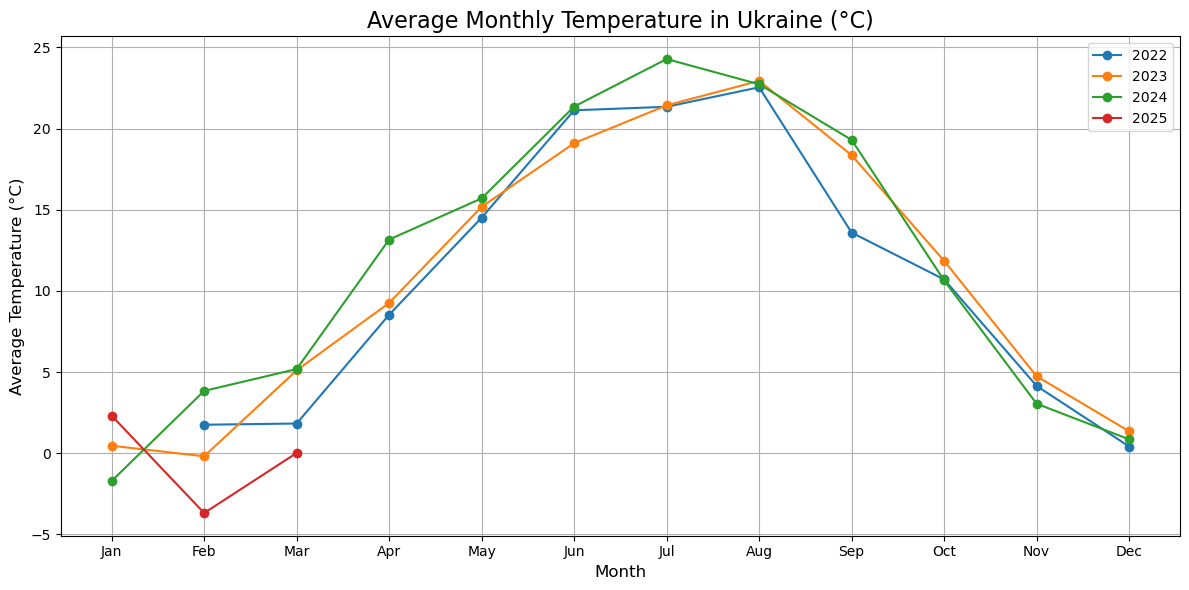

In [33]:
df_weather['month'] = df_weather['day_datetime'].dt.month
df_weather['year'] = df_weather['day_datetime'].dt.year

temp_2022 = df_weather[df_weather['year'] == 2022]
temp_2023 = df_weather[df_weather['year'] == 2023]
temp_2024 = df_weather[df_weather['year'] == 2024]
temp_2025 = df_weather[df_weather['year'] == 2025]

plt.figure(figsize=(12, 6))

temp_2022.groupby('month')['day_temp'].mean().plot(marker='o', linestyle='-', label='2022')
temp_2023.groupby('month')['day_temp'].mean().plot(marker='o', linestyle='-', label='2023')
temp_2024.groupby('month')['day_temp'].mean().plot(marker='o', linestyle='-', label='2024')
temp_2025.groupby('month')['day_temp'].mean().plot(marker='o', linestyle='-', label='2025')

plt.title('Average Monthly Temperature in Ukraine (°C)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Temperature (°C)', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Stacked Min and Max Temperatures by Region

In [34]:
unique_ids = sorted(df_weather['region_id'].unique())
unique_ids

[2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26]

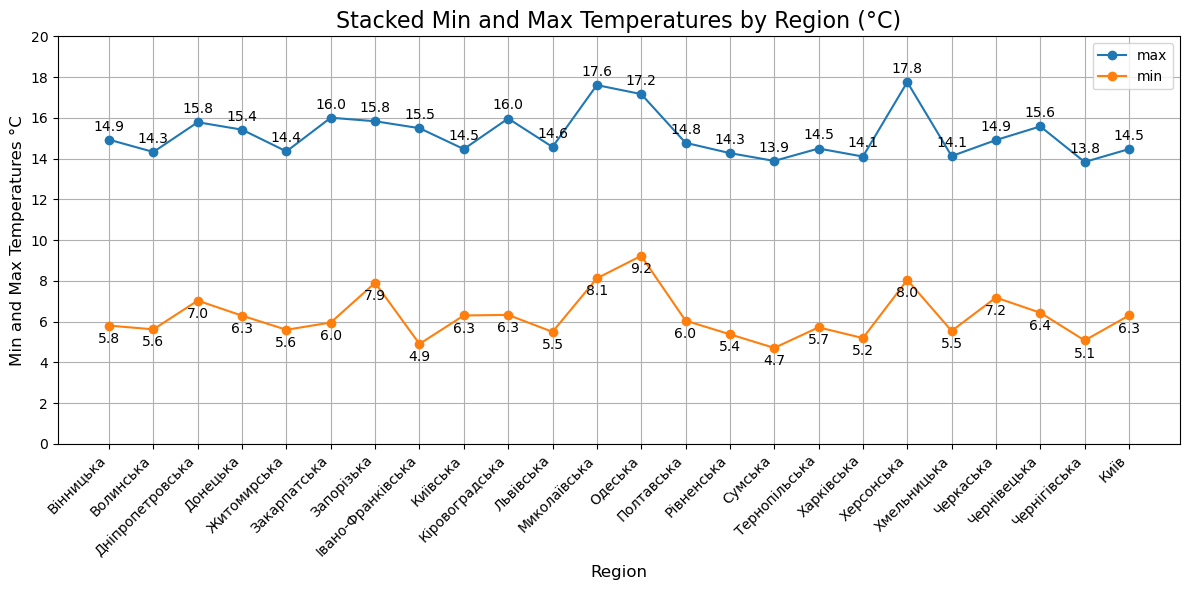

In [35]:
plt.figure(figsize=(12, 6))

grouped_max = df_weather.groupby('region_id')['day_tempmax'].mean().sort_index()
grouped_min = df_weather.groupby('region_id')['day_tempmin'].mean().sort_index()

region_ids = grouped_max.index.tolist()
region_labels = [id_to_region_name.get(rid, f"ID {rid}") for rid in region_ids]
x_pos = list(range(len(region_ids)))

plt.plot(x_pos, grouped_max.values, marker='o', linestyle='-', label='max')
plt.plot(x_pos, grouped_min.values, marker='o', linestyle='-', label='min')

plt.title('Stacked Min and Max Temperatures by Region (°C)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Min and Max Temperatures °C', fontsize=12)
plt.xticks(ticks=x_pos, labels=region_labels, rotation=45, ha='right')
plt.yticks(range(0, 22, 2))
plt.grid(True)
plt.legend()

for i, (y_max, y_min) in enumerate(zip(grouped_max.values, grouped_min.values)):
    plt.text(x_pos[i], y_max + 0.3, f"{y_max:.1f}", ha='center', va='bottom', fontsize=10, color='0')
    plt.text(x_pos[i], y_min - 0.3, f"{y_min:.1f}", ha='center', va='top', fontsize=10, color='0')

plt.tight_layout()
plt.show()

## Stacked Avr Cloudcover by Region

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


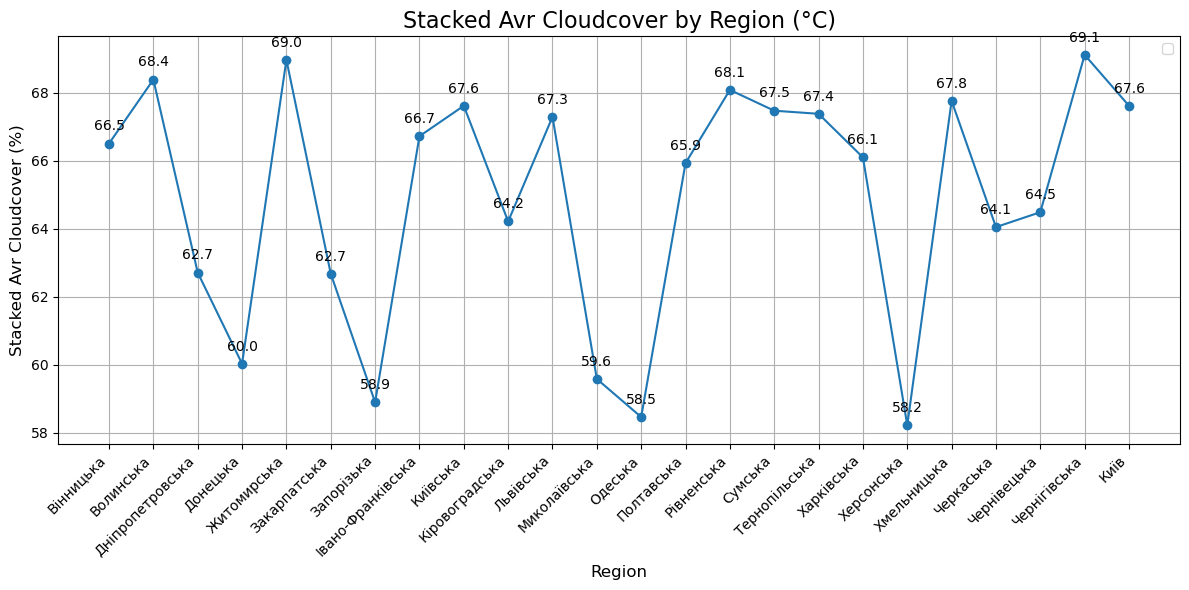

In [36]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])
df_weather['day_avr_cloudcover'] = df_weather.groupby(['day_datetime', 'region_id'])['hour_cloudcover'].transform('mean')
plt.figure(figsize=(12, 6))

grouped_cloud_reg = df_weather.groupby('region_id')['day_avr_cloudcover'].mean().sort_index()

region_ids = grouped_cloud_reg.index.tolist()
region_labels = [id_to_region_name.get(rid, f"ID {rid}") for rid in region_ids]

x_pos = list(range(len(region_ids)))

plt.plot(x_pos, grouped_cloud_reg.values, marker='o', linestyle='-')
plt.title('Stacked Avr Cloudcover by Region (°C)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Stacked Avr Cloudcover (%)', fontsize=12)
plt.xticks(ticks=x_pos, labels=region_labels, rotation=45, ha='right')
plt.grid(True)
plt.legend()

for x, y in zip(x_pos, grouped_cloud_reg.values):
    plt.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=10, color='0')

plt.tight_layout()
plt.show()

## Average Cloudcover by Month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


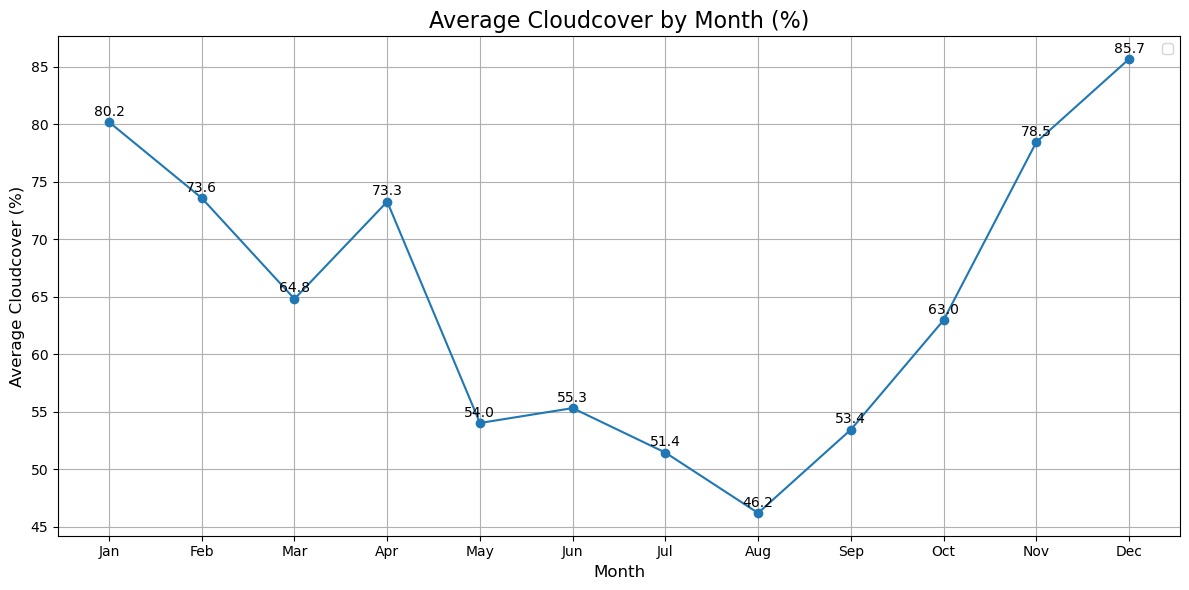

In [37]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])
df_weather['month'] = df_weather['day_datetime'].dt.month
df_weather['day_avr_cloudcover'] = df_weather.groupby(['day_datetime', 'region_id'])['hour_cloudcover'].transform('mean')

grouped_cloud_m = df_weather.groupby('month')['day_avr_cloudcover'].mean().reindex(range(1, 13)) 

plt.figure(figsize=(12, 6))
x_pos = list(range(1, 13)) 

plt.plot(x_pos, grouped_cloud_m.values, marker='o', linestyle='-')
plt.title('Average Cloudcover by Month (%)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Cloudcover (%)', fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0
)
plt.grid(True)
plt.legend()

for x, y in zip(x_pos, grouped_cloud_m.values):
    plt.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=10, color='0')

plt.tight_layout()
plt.show()

## Stacked Avr Visibility by Region

In [38]:
df_weather

,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,day_windspeed,...,hour_pressure,hour_visibility,hour_cloudcover,hour_solarradiation,hour_uvindex,region_id,month,year,datetime_full,day_avr_cloudcover
0,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,1020.0,0.000000,91.5,0.000000,0.000000,3,2,2022,2022-02-24 00:00:00,72.325
1,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,1021.0,0.200000,88.2,0.000000,0.000000,3,2,2022,2022-02-24 01:00:00,72.325
2,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,1022.0,10.000000,100.0,91.366165,0.828947,3,2,2022,2022-02-24 02:00:00,72.325
3,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,1021.0,0.100000,92.0,0.000000,0.000000,3,2,2022,2022-02-24 03:00:00,72.325
4,2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,15.5,...,1021.0,0.000000,93.8,0.000000,0.000000,3,2,2022,2022-02-24 04:00:00,72.325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634747,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1027.0,8.496354,95.6,0.000000,0.000000,10,3,2025,2025-03-01 19:00:00,99.500
634748,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1027.0,4.000000,100.0,0.000000,0.000000,10,3,2025,2025-03-01 20:00:00,99.500
634749,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1027.0,8.496354,100.0,0.000000,0.000000,10,3,2025,2025-03-01 21:00:00,99.500
634750,2025-03-01,1740780000,1.1,-1.1,0.0,-2.6,82.9,0.700,8.33,15.5,...,1027.0,8.496354,97.6,0.000000,0.000000,10,3,2025,2025-03-01 22:00:00,99.500


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


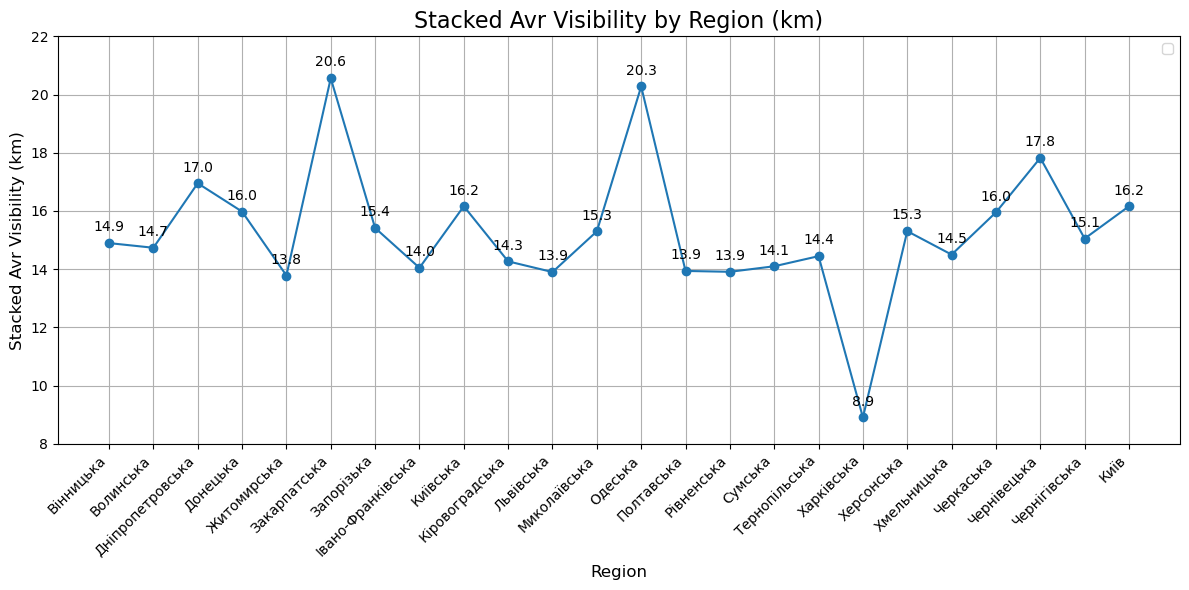

In [39]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])
df_weather['day_avr_visibility'] = df_weather.groupby(['day_datetime', 'region_id'])['hour_visibility'].transform('mean')
plt.figure(figsize=(12, 6))

grouped_visibil_reg = df_weather.groupby('region_id')['day_avr_visibility'].mean().sort_index()

region_ids = grouped_visibil_reg.index.tolist()
region_labels = [id_to_region_name.get(rid, f"ID {rid}") for rid in region_ids]
x_pos = list(range(len(region_ids)))

plt.plot(x_pos, grouped_visibil_reg.values, marker='o', linestyle='-')
plt.title('Stacked Avr Visibility by Region (km)', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Stacked Avr Visibility (km)', fontsize=12)
plt.xticks(ticks=x_pos, labels=region_labels, rotation=45, ha='right')
plt.yticks(range(8, 24, 2))
plt.grid(True)
plt.legend()

for x, y in zip(x_pos, grouped_visibil_reg.values):
    plt.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=10, color='0')

plt.tight_layout()
plt.show()

## Average Visibility by Month

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


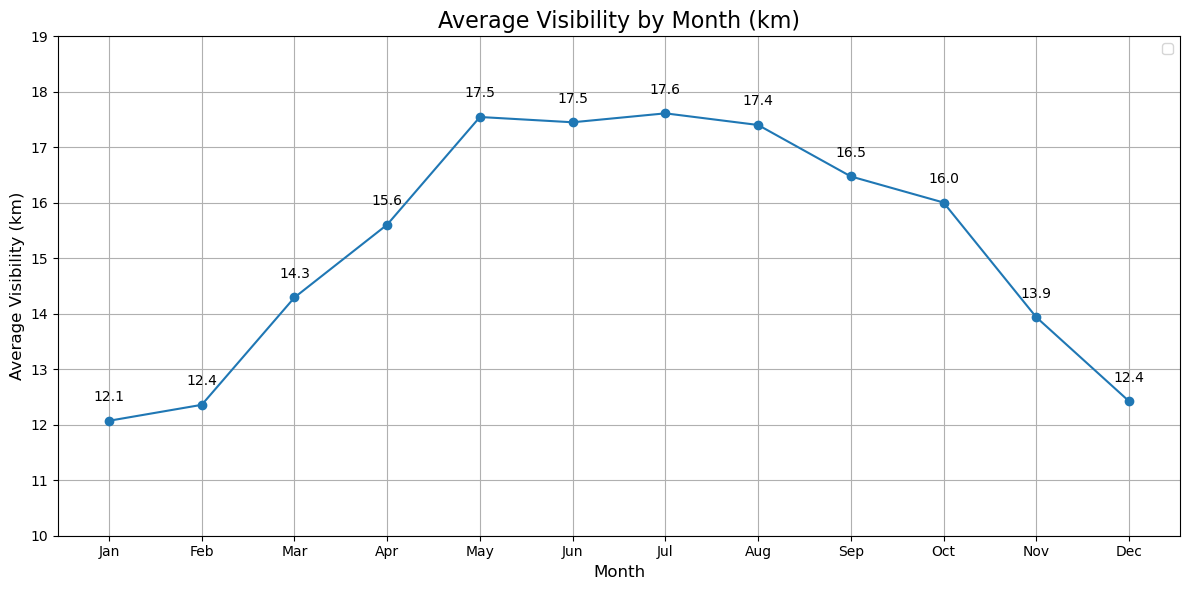

In [40]:
df_weather['day_datetime'] = pd.to_datetime(df_weather['day_datetime'])
df_weather['day_avr_visibility'] = df_weather.groupby(['day_datetime', 'region_id'])['hour_visibility'].transform('mean')

grouped_visibil_m = df_weather.groupby('month')['day_avr_visibility'].mean().reindex(range(1, 13))  # щоб було з 1 по 12

plt.figure(figsize=(12, 6))
x_pos = list(range(1, 13)) 

plt.plot(x_pos, grouped_visibil_m.values, marker='o', linestyle='-')
plt.title('Average Visibility by Month (km)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Visibility (km)', fontsize=12)
plt.xticks(
    ticks=range(1, 13),
    labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    rotation=0
)
plt.yticks(range(10, 20))
plt.grid(True)
plt.legend()

for x, y in zip(x_pos, grouped_visibil_m.values):
    plt.text(x, y + 0.3, f"{y:.1f}", ha='center', va='bottom', fontsize=10, color='0')

plt.tight_layout()
plt.show()

## Top 10 highest and lowest pressure

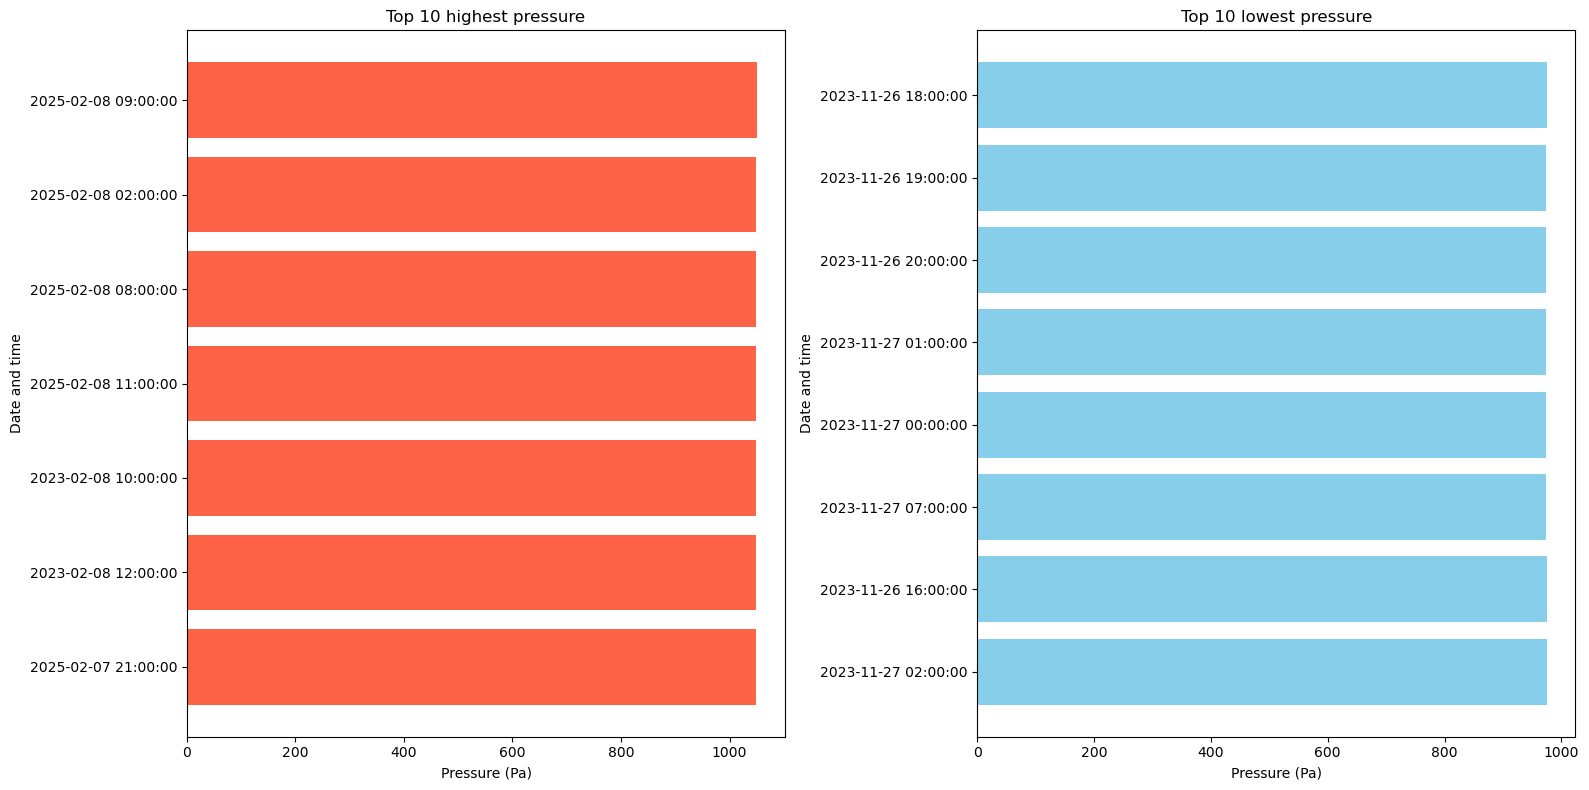

In [41]:
df_weather['hour_pressure'] = pd.to_numeric(df_weather['hour_pressure'], errors='coerce')

top10_high_pres = df_weather.nlargest(10, 'hour_pressure')
top10_low_pres = df_weather.nsmallest(10, 'hour_pressure')

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.barh(top10_high_pres['datetime_full'].astype(str), top10_high_pres['hour_pressure'], color='tomato')
plt.title('Top 10 highest pressure')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.barh(top10_low_pres['datetime_full'].astype(str), top10_low_pres['hour_pressure'], color='skyblue')
plt.title('Top 10 lowest pressure')
plt.xlabel('Pressure (Pa)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## Top 15 highest windspeed

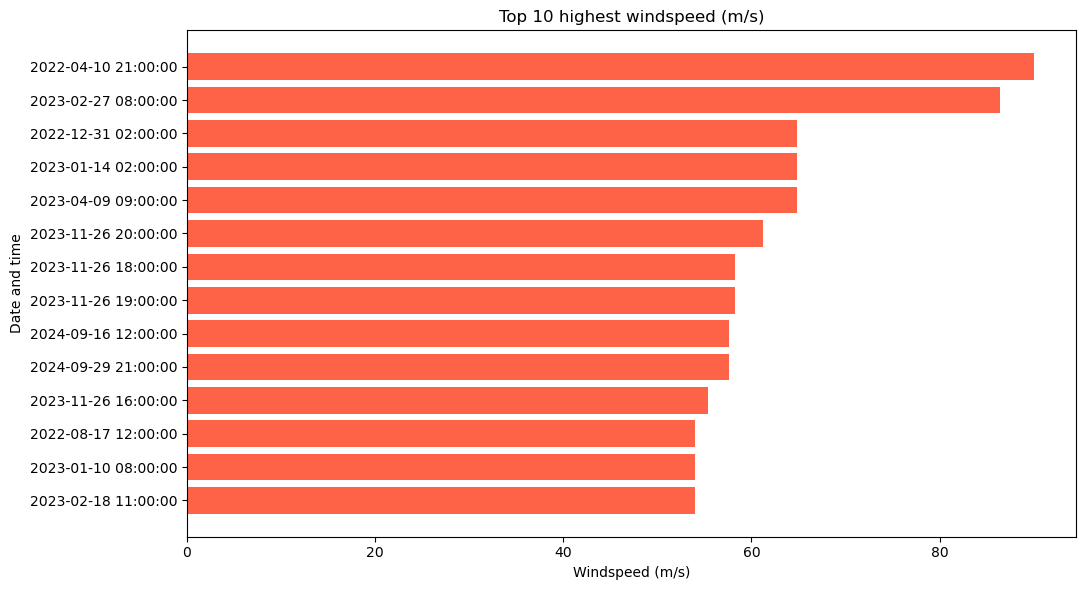

In [42]:
df_weather['hour_windspeed'] = pd.to_numeric(df_weather['hour_windspeed'], errors='coerce')
top10_high_wind = df_weather.nlargest(15, 'hour_windspeed')
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.barh(top10_high_wind['datetime_full'].astype(str), top10_high_wind['hour_windspeed'], color='tomato')
plt.title('Top 10 highest windspeed (m/s)')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [43]:
max_wind_row = df_weather.loc[df_weather['hour_windspeed'].idxmax()]
print(max_wind_row)


day_datetime           2022-04-10 00:00:00
day_datetimeEpoch               1649538000
day_tempmax                           19.4
day_tempmin                            4.2
day_temp                              12.2
day_dew                                6.6
day_humidity                          70.6
day_precip                            14.0
day_precipcover                       4.17
day_windspeed                         90.0
day_solarradiation                   220.2
day_solarenergy                       18.9
day_uvindex                            7.0
day_moonphase                         0.29
hour_datetime                     21:00:00
hour_datetimeEpoch              1649613600
hour_temp                              4.2
hour_humidity                        97.92
hour_dew                               3.9
hour_precip                           14.0
hour_precipprob                      100.0
hour_snow                              0.0
hour_snowdepth                         0.0
hour_windgu

In [44]:
sorted_df = df_weather.sort_values(by='hour_windspeed', ascending=False)
second_max_wind_row = sorted_df.iloc[2]
print(second_max_wind_row)

day_datetime           2023-04-09 00:00:00
day_datetimeEpoch               1680987600
day_tempmax                           12.7
day_tempmin                            8.2
day_temp                               9.8
day_dew                                7.9
day_humidity                          88.7
day_precip                             2.4
day_precipcover                       37.5
day_windspeed                         64.8
day_solarradiation                   136.2
day_solarenergy                       11.9
day_uvindex                            4.0
day_moonphase                         0.61
hour_datetime                     09:00:00
hour_datetimeEpoch              1681020000
hour_temp                              8.9
hour_humidity                        96.67
hour_dew                               8.4
hour_precip                            0.0
hour_precipprob                        0.0
hour_snow                              0.0
hour_snowdepth                         0.0
hour_windgu

### we find unrealistick data in df_weather['hour_windspeed']

In [45]:
df_weather['hour_windspeed'] = pd.to_numeric(df_weather['hour_windspeed'], errors='coerce')
df_weather.loc[df_weather['hour_windspeed'] > 80, 'hour_windspeed'] = None
mean_windspeed = df_weather['hour_windspeed'].mean()
df_weather['hour_windspeed'] = df_weather['hour_windspeed'].fillna(mean_windspeed)

## Top 15 highest windspeed (fixed)

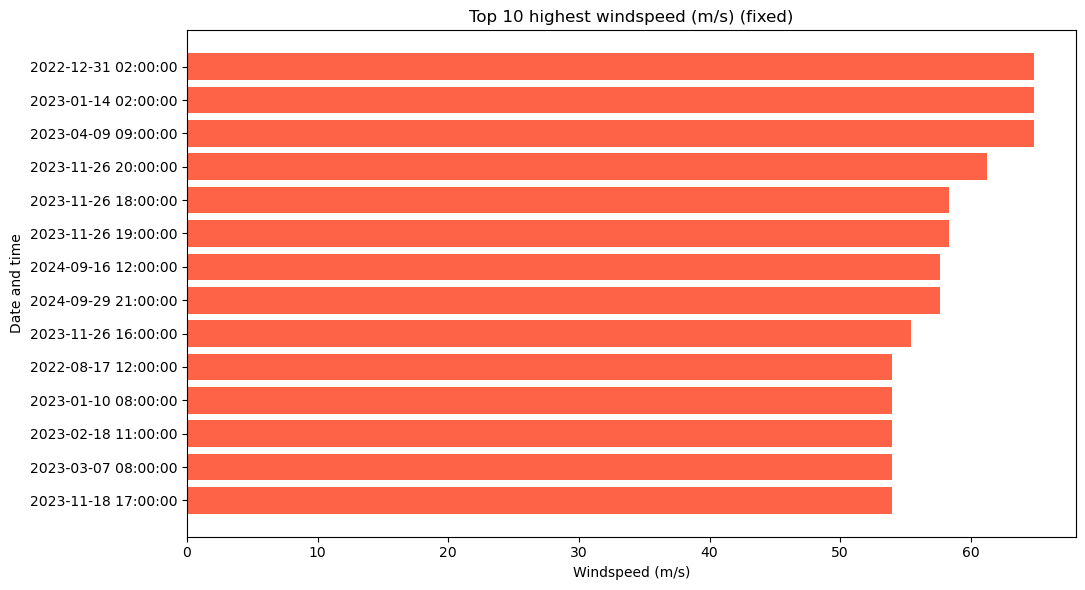

In [46]:
df_weather['hour_windspeed'] = pd.to_numeric(df_weather['hour_windspeed'], errors='coerce')
top10_high_wind = df_weather.nlargest(15, 'hour_windspeed')
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
plt.barh(top10_high_wind['datetime_full'].astype(str), top10_high_wind['hour_windspeed'], color='tomato')
plt.title('Top 10 highest windspeed (m/s) (fixed)')
plt.xlabel('Windspeed (m/s)')
plt.ylabel('Date and time')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()